读取一幅灰度图像，对图像使用锐化模板运算，在屏幕上显示变换前、后图像，以及变换前后图像的
灰度直方图。

In [1]:
#!/usr/bin/python3 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps

In [2]:
root_path = '/root/DIVP_project/'
einstein_path = "project02/proj02-images/einstein_orig.tif"
baboon_path = "project02/proj02-images/baboon.jpg"

In [3]:
image_einstein = Image.open(root_path + baboon_path)
if image_einstein.mode != "L":
    image_einstein = image_einstein.convert("L")

In [4]:
def image_convolution(image: Image, kernel: np.ndarray) -> Image:
    # 获取图像的宽高
    width, height = image.size
    # 获取kernel的宽高
    kernel_width, kernel_height = kernel.shape
    # 创建一个新的图像 Image
    res_image = Image.new('L', (width, height), 0)
    # 获取图像的像素值
    res_image_pixel = res_image.load()
    image_pixel = image.load()
    # 对图像进行平滑处理
    # 添加padding，使得图像的边界也能被处理，防止越界image index out of range
    pad_width = kernel_width // 2
    pad_height = kernel_height // 2
    padded_image = ImageOps.expand(image, border=(pad_width, pad_height), fill=0)
    padded_image_pixel = padded_image.load()
    for i in range(width):
        for j in range(height):
            # 初始化像素值
            pixel = 0
            for k in range(kernel_width):
                for l in range(kernel_height):
                    # 获取像素值
                    pixel += padded_image_pixel[i + k, j + l] * kernel[k, l]
            # 将像素值保存到新的图像中
            if(np.sum(kernel) != 0):
                res_image_pixel[i, j] = int(pixel/np.sum(kernel))
            else:
                res_image_pixel[i, j] = int(pixel)
    
    return res_image

In [5]:
flag_noise = 1
# 为图像加入椒盐噪声
if flag_noise == 1:
    image_einstein = np.array(image_einstein)
    image_einstein = image_einstein + np.random.normal(0, 100, image_einstein.shape)
    image_einstein = np.clip(image_einstein, 0, 255)
    image_einstein = image_einstein.astype(np.uint8)
    image_einstein = Image.fromarray(image_einstein)


In [6]:
# 对image_einstein使用锐化模板运算
image_einstein_temp = np.array(image_einstein)
image_einstein_temp = cv2.filter2D(image_einstein_temp, -1, np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]))

In [7]:
# 使用自己的方法进行锐化
image_einstein_temp2 = image_convolution(image_einstein, np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]))

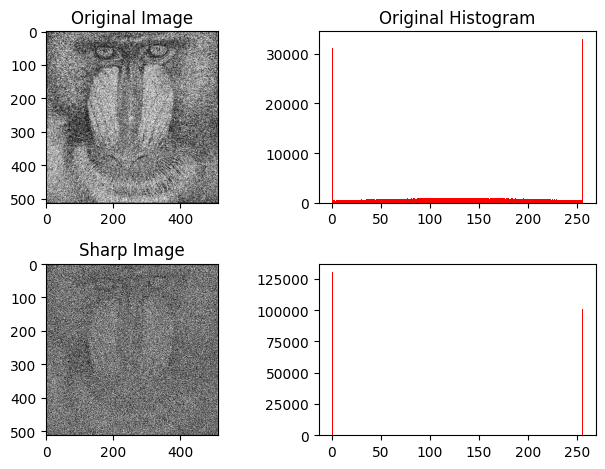

In [8]:
# 可视化图像，并统计直方图
plt.figure()
plt.subplot(221)
plt.imshow(image_einstein, cmap='gray')
plt.title('Original Image')
plt.subplot(222)
plt.hist(np.array(image_einstein).flatten(), bins=256, range=[0, 256], color='r')
plt.title('Original Histogram')
plt.subplot(223)
plt.imshow(image_einstein_temp2, cmap='gray')
plt.title('Sharp Image')
plt.subplot(224)
plt.hist(np.array(image_einstein_temp2).flatten(), bins=256, range=[0, 256], color='r')
plt.tight_layout()
plt.show()